In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

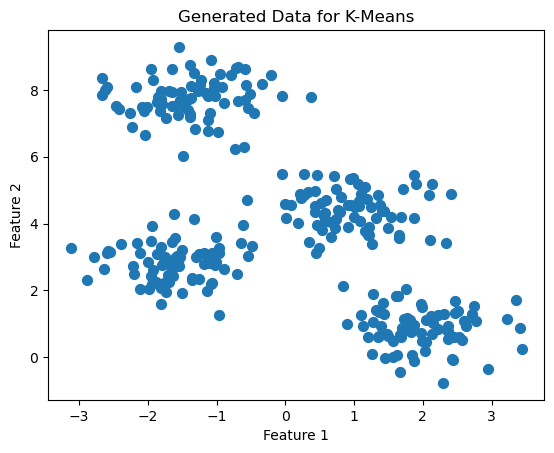

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

# Generate synthetic data using make_blobs
# n_samples: The total number of points equally divided among clusters
# centers: The number of centers to generate, or the fixed center locations
# cluster_std: The standard deviation of the clusters
# n_features: The number of features for each sample
# random_state: Determines random number generation for dataset creation
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, n_features=2, random_state=0)

# Plotting the generated data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data for K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# k means algorithm

1. Randomly initialize k centroids
2. Assign each point to the closest cluster refered by the centroid
3. update the centroid to be the mean of each cluster
4. repeat until convergence

In [27]:
X.shape

(300, 2)

In [132]:
def plot_clusters(X, clusters,centroids):
    cluster_ids = np.unique(clusters)
    colors = {0:'red',
              1:'blue',
              2:'green',
              3:'cyan'}
    
    for cluster_id in cluster_ids:
        # Plotting the generated data
        plt.scatter(X[clusters==cluster_id, 0], X[clusters==cluster_id, 1], s=50, color=colors[cluster_id],alpha=0.2)
        plt.title("Generated Data for K-Means")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.scatter(centroids[cluster_id,0], centroids[cluster_id,1], s=50, marker='+', color=colors[cluster_id])
    plt.show()



In [133]:
np.random.seed(0)
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster = []
        self.centroids = []
    def fit(self, X):
        # get k random centroids
        centroid_ids = np.random.choice(len(X),size=self.k)
        self.centroids = X[centroid_ids]
        prev_centroids = None
        print(f"centroids = {self.centroids}")
        centroid_dist = math.inf
        self.cluster = np.zeros(len(X),dtype=int)
        while centroid_dist>=1e-5:
            prev_centroids = self.centroids.copy()
            #assign each point to the closest cluster centroid
            for i in range(len(X)):
                dist = np.sum((self.centroids-X[i,:])**2,axis=1)
                self.cluster[i] = np.argmin(dist)
            #update the cluster centers /centroids as mean of the cluster points
            for i in range(len(self.centroids)):
                #check if atleast one point is assigned to centroids[i]
                if len(self.cluster[self.cluster==i])>0:
                    cluster_points = X[self.cluster==i,:]
                    self.centroids[i] = np.mean(cluster_points,axis=0)
                else:
                    self.centroids[i] = X[np.random.choice(len(X))]
            centroid_dist = np.sum((self.centroids-prev_centroids)**2)
            plot_clusters(X,self.cluster,self.centroids)
        print(f"k means converged with error = {centroid_dist}")
        print(f"centroids = {self.centroids}")
    def predict(self, X):
        cluster = np.zeros(len(X))
        for i in range(len(X)):
            dist = np.sum((self.centroids-X[i,:])**2,axis=1)
            cluster[i]=np.argmin(dist)
        return cluster

centroids = [[ 1.48170052  0.69007459]
 [-1.55220688  2.74574995]
 [ 1.10550448  1.26389129]
 [ 1.01618041  4.48527047]]


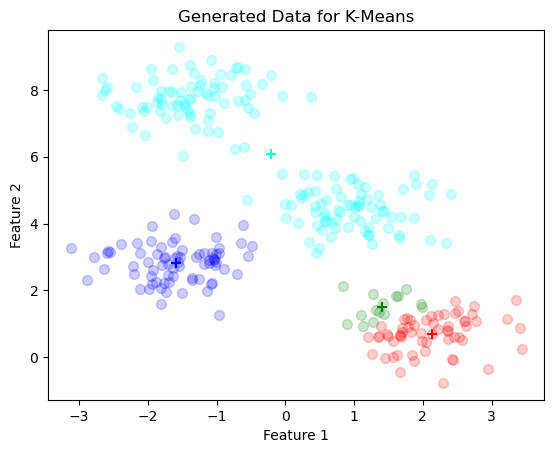

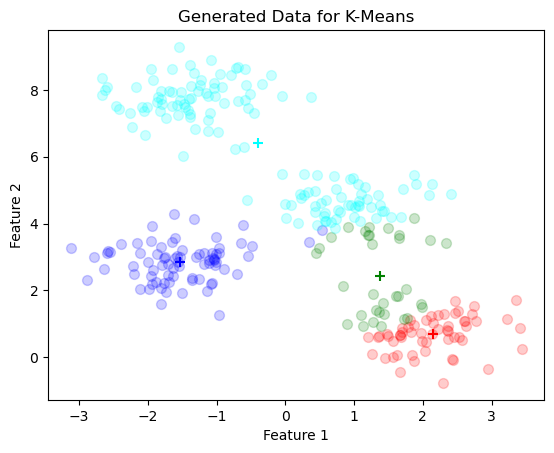

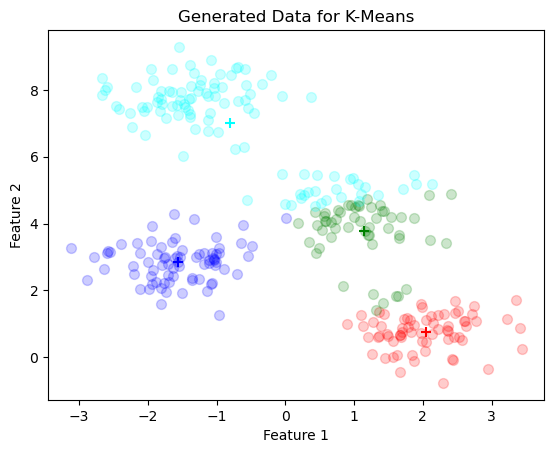

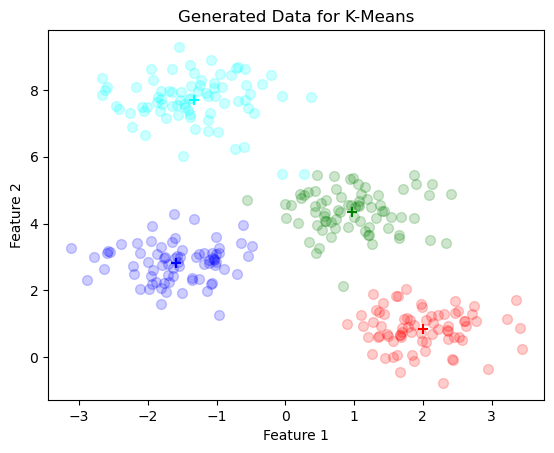

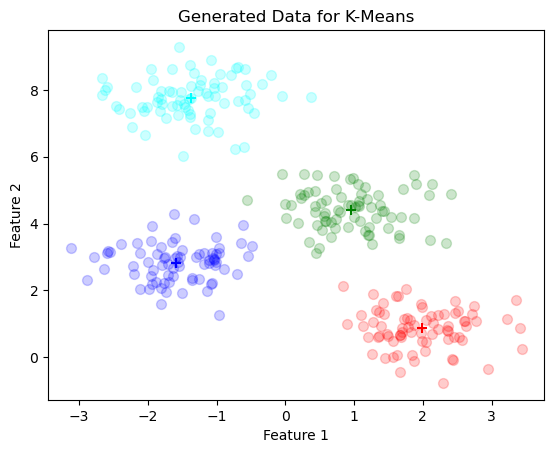

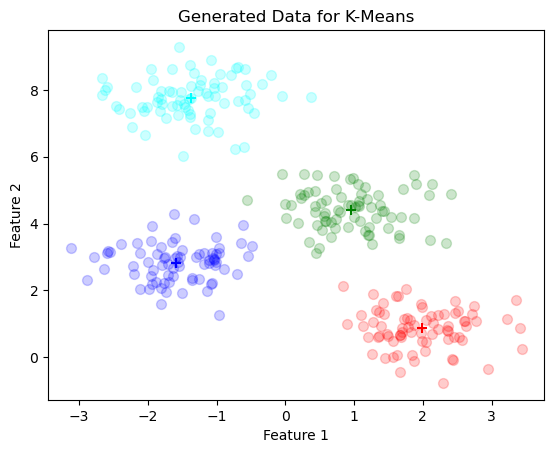

k means converged with error = 0.0
centroids = [[ 1.98258281  0.86771314]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]]


In [134]:
kmeans = KMeans(k=4)
kmeans.fit(X)

In [87]:
clusters = kmeans.predict(X)

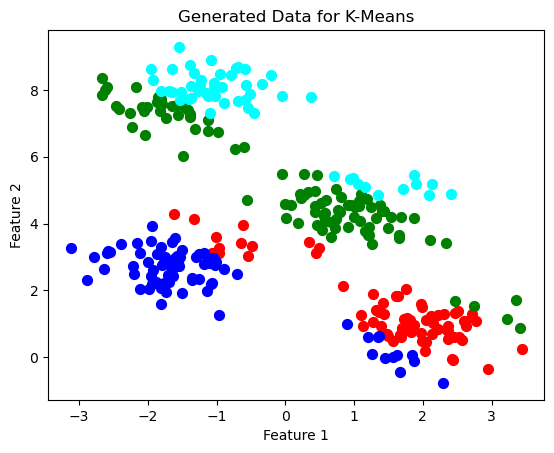

In [88]:
clusters

array([0., 2., 3., 3., 0., 0., 1., 2., 3., 3., 1., 2., 2., 2., 1., 2., 2.,
       0., 0., 1., 0., 0., 2., 1., 1., 2., 0., 2., 1., 2., 3., 2., 2., 2.,
       3., 2., 2., 2., 1., 0., 2., 1., 2., 2., 1., 1., 3., 1., 2., 0., 1.,
       0., 3., 0., 0., 1., 3., 1., 2., 0., 2., 2., 3., 1., 1., 1., 2., 0.,
       2., 1., 2., 0., 3., 1., 1., 3., 1., 2., 0., 3., 1., 2., 0., 0., 3.,
       3., 0., 2., 2., 2., 2., 0., 3., 1., 1., 2., 0., 0., 2., 1., 3., 1.,
       3., 0., 2., 0., 0., 3., 2., 3., 1., 1., 0., 2., 0., 2., 2., 0., 0.,
       2., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 3., 1., 1., 0., 2., 1.,
       1., 2., 0., 3., 2., 1., 2., 0., 3., 1., 2., 2., 3., 2., 3., 2., 2.,
       2., 1., 1., 3., 1., 0., 2., 3., 2., 2., 0., 2., 1., 1., 2., 0., 2.,
       2., 3., 0., 3., 0., 3., 2., 0., 2., 0., 0., 2., 1., 1., 2., 2., 3.,
       2., 0., 2., 0., 1., 2., 2., 1., 1., 1., 2., 1., 3., 2., 0., 1., 1.,
       2., 2., 1., 3., 2., 2., 2., 1., 2., 3., 3., 1., 1., 0., 0., 2., 2.,
       0., 0., 1., 1., 1.